In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_salary= pd.read_csv("dataset/Salary_dataset.csv")

In [8]:
df_salary

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df_salary.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [6]:
df_salary.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df_salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
df_salary.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


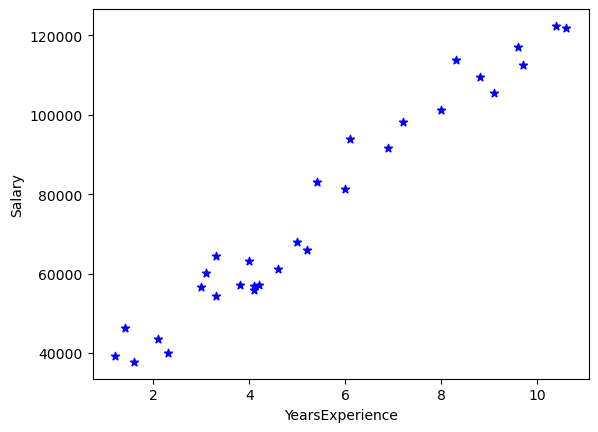

In [17]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(df_salary.YearsExperience,df_salary.Salary,color="blue",marker="*")
plt.show()

In [19]:
df_salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [21]:
X = df_salary.drop("Salary",axis=1)
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [23]:
Y=df_salary.Salary
Y

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [64]:
Linear_Model = linear_model.LinearRegression()
Linear_Model.fit(x_train,y_train)

LinearRegression()

In [66]:
x_test

,YearsExperience
7,3.3
5,3.0
0,1.2
14,4.6
29,10.6
8,3.3
10,4.0
19,6.1


In [68]:
Linear_Model.predict([[9.0]])[0]

110069.27964327009

In [70]:
res_x_text=Linear_Model.predict(x_test)
res_x_text

array([ 54704.69850985,  51790.77318704,  34307.22125017,  67331.70824204,
       125610.21469826,  54704.69850985,  61503.85759641,  81901.33485609])

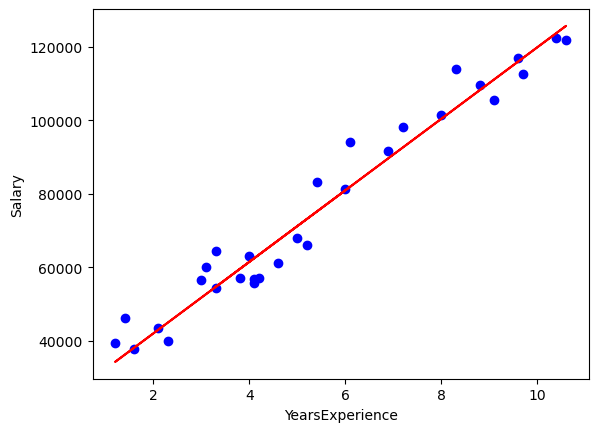

In [72]:
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(df_salary.YearsExperience,df_salary.Salary,color="blue")
plt.plot(x_test,res_x_text,color="red")
plt.show()

In [78]:
Linear_Model.coef_

array([9713.08440937])

In [80]:
Linear_Model.intercept_

22651.519958925914

In [82]:
Linear_Model.score(x_test,y_test)

0.9278979073529698

In [88]:
import joblib

In [90]:
joblib.dump(Linear_Model,"Salary_prediction")

['Salary_prediction']

In [ ]:
joblib.dump(Linear_Model, r"your\desired\path\Salary_prediction.joblib")